In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print(X.head())
print(iris.target_names)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa' 'versicolor' 'virginica']


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [5]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



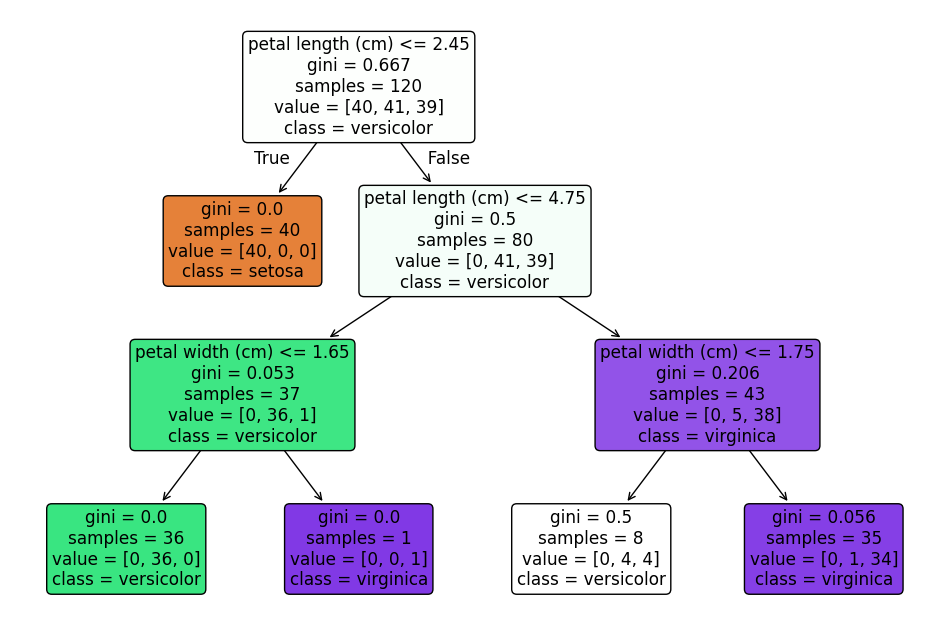

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(clf,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True,
               rounded=True)
plt.show()


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Models ---
# SVM
svm_clf = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_acc = accuracy_score(y_test, svm_clf.predict(X_test_scaled))

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_clf.predict(X_test))

# Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_clf.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt_clf.predict(X_test))

# Comparison Table
comparison = pd.DataFrame({
    'Model': ['SVM', 'Naive Bayes', 'Decision Tree'],
    'Accuracy': [svm_acc, nb_acc, dt_acc],
    'Regularization': [
        'C (soft margin) & kernel parameters regulate complexity',
        'No explicit regularization; assumes feature independence',
        'max_depth, min_samples_split, pruning control complexity'
    ]
})

print(comparison)


           Model  Accuracy                                     Regularization
0            SVM  0.966667  C (soft margin) & kernel parameters regulate c...
1    Naive Bayes  0.966667  No explicit regularization; assumes feature in...
2  Decision Tree  0.933333  max_depth, min_samples_split, pruning control ...
